<a href="https://colab.research.google.com/github/LuisPablo19/Extraccion-de-caracteristicas/blob/main/Actividad_4_(Extracci%C3%B3n_de_Caracter%C3%ADsticas).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Actividad 4: Extracción de Características**
##Luis Pablo Padilla Barbosa
##A00572040

In [1]:
!pip install funpymodeling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.5/215.5 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post4-py3-none-any.whl size=2973 sha256=5fa18fd90ab188f6e62a95b6fef8ab91db74224eaedd9c7270206527406f5644
  Stored in directory: /root/.cache/pip/wheels/46/b8/69/4f7789b7d2fc0718a44cbc4ae5d40970a40c22c472ae50f0a1
Successfully built sklearn
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files 
from funpymodeling.exploratory import freq_tbl 

In [3]:
df = pd.read_excel("microretailer_mit_lift_lab.xlsx")

###**Limpieza de datos**

**Valores nulos**

In [18]:
numericos = df._get_numeric_data()
categoricos = df.drop(numericos.columns, axis = 1)

In [75]:
lista = []
for t in range(len(categoricos.columns)):
  if categoricos.iloc[:,t].count() < 90: 
    lista.append(categoricos.iloc[:,t].name)
ejemplo = categoricos.drop(lista, axis = 1)
columnas = ejemplo.columns
columnas

Index(['_record_id', '_title', '_server_updated_at', '_updated_by',
       '_geometry', '228_store_name', '229_store_picture', '232_type_of_store',
       '108_does_the_micro_retailer_has_a_barred_window_',
       '99_does_the_micro_retailer_exhibits_products_outside_',
       '102_does_the_micro_retailer_sells_fresh_products_',
       '184_store_devices', 'pictures_of_shelves_if_possible',
       'hola_somos_estudiantes_del_tec_de_monterrey_estamos_realiz',
       'le_comento_que_toda_esta_informacin_es_confidencial',
       '233_date_establishment', '5_change_store_space_last_year',
       '6_change_employees_average_salary_last_year',
       '20_reviews_finances_monthly', '49_inventory_records',
       '18_sales_records', '155_sales_registers_used_for', '19_tax_id',
       '310_burnout', '186_internet_connection', '210_sales_channels',
       '189_payment_methods', '28_prefered_payment_method',
       '31_different_prices_payment_method', '269_cash_discount',
       '270_card_extra_

In [20]:
data = numericos.copy()
numericos=numericos.fillna(round(data.mean(),1))
numericos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 25 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   _latitude                                          171 non-null    float64
 1   _longitude                                         171 non-null    float64
 2   97_number_of_customers_in_store                    171 non-null    int64  
 3   268_number_fridges                                 171 non-null    float64
 4   104_how_many_shelves_does_the_micro_retailer_have  171 non-null    int64  
 5   2_current_permanent_employees                      171 non-null    float64
 6   4_number_permanent_employees_last_year             171 non-null    float64
 7   103_number_own_fridges                             171 non-null    float64
 8   145_number_direct_competitors                      171 non-null    float64
 9   24_burnout

In [21]:
numericos = numericos.drop(['271_card_fee','273_platform_extra_charge','274_platform_fee', '275_platform_days_receive_money', '236_whatsapp'], axis = 1)
numericos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 20 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   _latitude                                          171 non-null    float64
 1   _longitude                                         171 non-null    float64
 2   97_number_of_customers_in_store                    171 non-null    int64  
 3   268_number_fridges                                 171 non-null    float64
 4   104_how_many_shelves_does_the_micro_retailer_have  171 non-null    int64  
 5   2_current_permanent_employees                      171 non-null    float64
 6   4_number_permanent_employees_last_year             171 non-null    float64
 7   103_number_own_fridges                             171 non-null    float64
 8   145_number_direct_competitors                      171 non-null    float64
 9   24_burnout

In [22]:
categoricos = categoricos.fillna("Sin categoría")
categoricos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 81 columns):
 #   Column                                                      Non-Null Count  Dtype 
---  ------                                                      --------------  ----- 
 0   _record_id                                                  171 non-null    object
 1   _title                                                      171 non-null    object
 2   _server_updated_at                                          171 non-null    object
 3   _updated_by                                                 171 non-null    object
 4   _geometry                                                   171 non-null    object
 5   228_store_name                                              171 non-null    object
 6   229_store_picture                                           171 non-null    object
 7   232_type_of_store                                           171 non-null    object
 8   108_does_t

**Outliers**

<Figure size 1500x800 with 0 Axes>

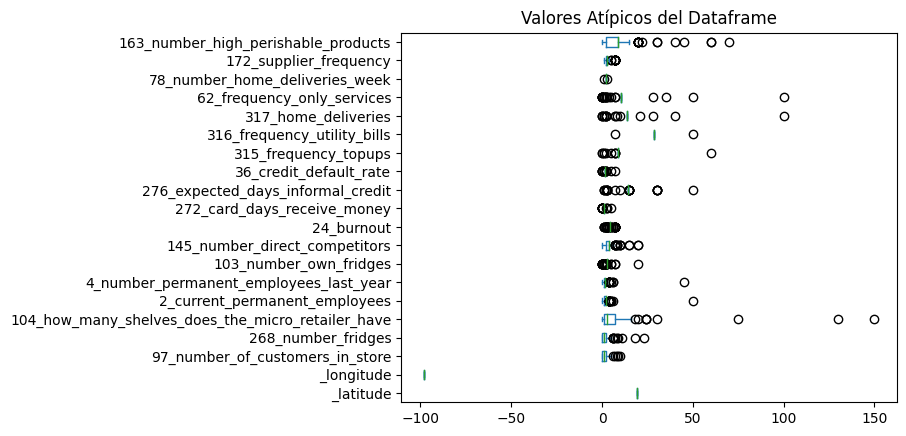

In [23]:
fig = plt.figure(figsize =(15, 8))
numericos.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show()

In [24]:
y=numericos

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido _latitude                                            19.138774
_longitude                                          -98.075320
97_number_of_customers_in_store                       5.000000
268_number_fridges                                    5.000000
104_how_many_shelves_does_the_micro_retailer_have    16.000000
2_current_permanent_employees                         3.750000
4_number_permanent_employees_last_year                3.250000
103_number_own_fridges                                2.500000
145_number_direct_competitors                         6.750000
24_burnout                                            4.200000
272_card_days_receive_money                           1.000000
276_expected_days_informal_credit                    14.200000
36_credit_default_rate                                1.600000
315_frequency_topups                                  9.000000
316_frequency_utility_bills                          28.500000
317_home_deliveries          

In [25]:
outliers_iqr= numericos[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

,_latitude,_longitude,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,272_card_days_receive_money,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0
2,NaN,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN,NaN,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
data4_iqr= numericos[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data4_iqr

,_latitude,_longitude,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,272_card_days_receive_money,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products
0,19.053536,-98.233822,2.0,0.0,4.0,2.0,2.0,2.5,3.0,4.2,1.0,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,0.0
1,19.053561,-98.234142,0.0,4.0,8.0,1.0,1.0,2.5,4.0,4.2,1.0,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,NaN
2,19.058655,-98.232300,0.0,0.0,NaN,2.0,2.0,2.5,0.0,4.2,NaN,NaN,1.6,9.0,28.5,13.6,10.5,2.0,3.0,NaN
3,19.059293,-98.233158,0.0,0.0,2.0,1.0,1.0,2.5,4.0,4.2,NaN,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,0.0
4,19.059585,-98.233864,0.0,0.0,16.0,0.0,0.0,2.5,0.0,4.2,1.0,NaN,1.6,9.0,28.5,13.6,10.5,2.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,19.043115,-98.194066,1.0,0.0,5.0,2.1,1.9,2.5,3.8,4.2,1.0,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,8.6
167,19.042794,-98.193802,1.0,5.0,5.0,2.1,1.9,2.5,3.8,4.2,1.0,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,8.6
168,19.042809,-98.193439,3.0,1.0,1.0,2.1,1.9,2.5,3.8,4.2,1.0,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,8.6
169,19.042558,-98.193818,0.0,1.0,1.0,2.1,1.9,2.5,3.8,4.2,1.0,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,8.6


In [27]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data4_iqr.isnull().sum()
valores_nulos

_latitude                                             0
_longitude                                            0
97_number_of_customers_in_store                       5
268_number_fridges                                   10
104_how_many_shelves_does_the_micro_retailer_have     9
2_current_permanent_employees                        15
4_number_permanent_employees_last_year               12
103_number_own_fridges                               27
145_number_direct_competitors                        15
24_burnout                                           38
272_card_days_receive_money                          14
276_expected_days_informal_credit                    24
36_credit_default_rate                               14
315_frequency_topups                                 10
316_frequency_utility_bills                           2
317_home_deliveries                                  17
62_frequency_only_services                           24
78_number_home_deliveries_week                  

In [28]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data5_iqr=data4_iqr.copy()
data5_iqr=data5_iqr.fillna(round(data4_iqr.mean(),1))
data5_iqr

,_latitude,_longitude,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,272_card_days_receive_money,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products
0,19.053536,-98.233822,2.0,0.0,4.0,2.0,2.0,2.5,3.0,4.2,1.0,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,0.0
1,19.053561,-98.234142,0.0,4.0,8.0,1.0,1.0,2.5,4.0,4.2,1.0,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,6.1
2,19.058655,-98.232300,0.0,0.0,4.0,2.0,2.0,2.5,0.0,4.2,1.0,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,6.1
3,19.059293,-98.233158,0.0,0.0,2.0,1.0,1.0,2.5,4.0,4.2,1.0,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,0.0
4,19.059585,-98.233864,0.0,0.0,16.0,0.0,0.0,2.5,0.0,4.2,1.0,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,19.043115,-98.194066,1.0,0.0,5.0,2.1,1.9,2.5,3.8,4.2,1.0,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,8.6
167,19.042794,-98.193802,1.0,5.0,5.0,2.1,1.9,2.5,3.8,4.2,1.0,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,8.6
168,19.042809,-98.193439,3.0,1.0,1.0,2.1,1.9,2.5,3.8,4.2,1.0,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,8.6
169,19.042558,-98.193818,0.0,1.0,1.0,2.1,1.9,2.5,3.8,4.2,1.0,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,8.6


In [29]:
Datos_limpios = pd.concat([categoricos, numericos], axis=1)
Datos_limpios

,_record_id,_title,_server_updated_at,_updated_by,_geometry,228_store_name,229_store_picture,232_type_of_store,108_does_the_micro_retailer_has_a_barred_window_,99_does_the_micro_retailer_exhibits_products_outside_,...,272_card_days_receive_money,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products
0,dff2998e-af74-4de6-8efd-488aca24e67b,"November 12, 2022",2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),Eugene’s Compostura,1 Photo,Tailor,yes,no,...,1.0,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,0.0
1,c596412f-4fc2-4983-acba-d9565859e42f,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2341421351 19.0535610353),Frutas y verduras Angy,1 Photo,Grocery store (aka. nanostore),no,yes,...,1.0,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,60.0
2,5bb632b3-41b5-4fb6-a817-b564e8b45a48,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.232299887 19.058654656),Libélula,1 Photo,Grocery store (aka. nanostore),yes,no,...,0.0,10.0,1.6,9.0,28.5,13.6,10.5,2.0,3.0,60.0
3,6774a0f6-bab4-4a58-bf94-95ad0b7cb438,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2331576513 19.0592929035),Quality fix,1 Photo,Grocery store (aka. nanostore),no,no,...,0.0,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,0.0
4,6cc637fa-3d54-48c7-9499-6de13d0a26aa,"November 12, 2022",2022-11-12 22:15:08 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2338639604 19.0595846029),Artesanías Los Pinos,1 Photo,Grocery store (aka. nanostore),yes,no,...,1.0,15.0,1.6,9.0,28.5,13.6,10.5,2.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,2413f06e-15cc-4a6f-8e83-5224c6824b12,"November 3, 2022",2022-11-03 16:50:48 UTC,Emilio Garza,SRID=4326;POINT(-98.1940658722 19.0431145635),July Store,1 Photo,Grocery store (aka. nanostore),yes,no,...,1.0,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,8.6
167,962bf5a6-1eff-4874-a627-9cd8e3ca27b4,"November 3, 2022",2022-11-03 16:28:15 UTC,Emilio Garza,SRID=4326;POINT(-98.1938023854 19.0427938182),Miscelánea rubí,1 Photo,Grocery store (aka. nanostore),no,no,...,1.0,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,8.6
168,9ff658db-4dc5-48b6-aa0b-5c6668bb6720,"November 3, 2022",2022-11-03 16:28:14 UTC,Emilio Garza,SRID=4326;POINT(-98.1934387078 19.0428094171),La fonda,1 Photo,Micro-restaurant (aka. fondita),yes,no,...,1.0,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,8.6
169,e88aa9c1-dc8b-4180-99a1-2e0118ad905d,"November 3, 2022",2022-11-03 16:18:37 UTC,Francisco Adán,SRID=4326;POINT(-98.193818 19.042558),"Birria de Res ""Hermanos Negreros 2"" estilo Tij...",1 Photo,Micro-restaurant (aka. fondita),no,no,...,1.0,14.2,1.6,9.0,28.5,13.6,10.5,2.0,3.0,8.6


In [30]:
valores_nulos=Datos_limpios.isnull().sum()
valores_nulos[valores_nulos > 0]

Series([], dtype: int64)

In [76]:
columnas

Index(['_record_id', '_title', '_server_updated_at', '_updated_by',
       '_geometry', '228_store_name', '229_store_picture', '232_type_of_store',
       '108_does_the_micro_retailer_has_a_barred_window_',
       '99_does_the_micro_retailer_exhibits_products_outside_',
       '102_does_the_micro_retailer_sells_fresh_products_',
       '184_store_devices', 'pictures_of_shelves_if_possible',
       'hola_somos_estudiantes_del_tec_de_monterrey_estamos_realiz',
       'le_comento_que_toda_esta_informacin_es_confidencial',
       '233_date_establishment', '5_change_store_space_last_year',
       '6_change_employees_average_salary_last_year',
       '20_reviews_finances_monthly', '49_inventory_records',
       '18_sales_records', '155_sales_registers_used_for', '19_tax_id',
       '310_burnout', '186_internet_connection', '210_sales_channels',
       '189_payment_methods', '28_prefered_payment_method',
       '31_different_prices_payment_method', '269_cash_discount',
       '270_card_extra_

###**232_type_of_store**

In [32]:
nombre_columna = '232_type_of_store'
tabla= freq_tbl(Datos_limpios[nombre_columna])
Filtro= tabla[tabla['frequency']>2]
Filtro_index= Filtro.set_index(nombre_columna)
Filtro_index

,frequency,percentage,cumulative_perc
232_type_of_store,,,
Grocery store (aka. nanostore),52,0.304094,0.304094
Micro-restaurant (aka. fondita),31,0.181287,0.485380
Dairy products,10,0.058480,0.543860
Cafeteria,6,0.035088,0.578947
Butcher shop,6,0.035088,0.614035
Produce (fruits & vegetables),4,0.023392,0.637427


<Axes: ylabel='frequency'>

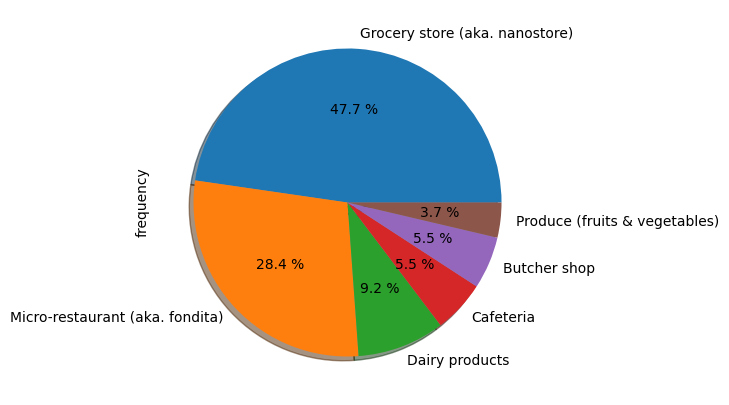

In [33]:
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

###**5_change_store_space_last_year**

In [34]:
nombre_columna = '5_change_store_space_last_year'
tabla= freq_tbl(Datos_limpios[nombre_columna])
Filtro= tabla[tabla['frequency']>2]
Filtro_index= Filtro.set_index(nombre_columna)
Filtro_index

,frequency,percentage,cumulative_perc
5_change_store_space_last_year,,,
No cambió,72,0.421053,0.421053
Sin categoría,72,0.421053,0.842105
Disminuyó 15%,9,0.052632,0.894737
Aumentó 25%,7,0.040936,0.935673
Aumentó 15%,4,0.023392,0.959064
Aumentó 50% o más,4,0.023392,0.982456


<Axes: ylabel='frequency'>

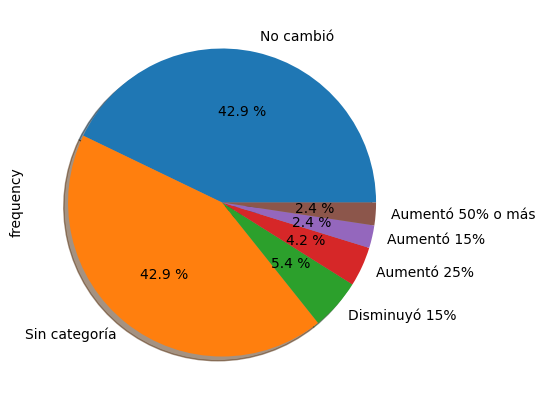

In [35]:
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

###**108_does_the_micro_retailer_has_a_barred_window_**

In [36]:
nombre_columna = '108_does_the_micro_retailer_has_a_barred_window_'
tabla= freq_tbl(Datos_limpios[nombre_columna])
Filtro= tabla[tabla['frequency']>2]
Filtro_index= Filtro.set_index(nombre_columna)
Filtro_index

,frequency,percentage,cumulative_perc
108_does_the_micro_retailer_has_a_barred_window_,,,
no,124,0.725146,0.725146
yes,47,0.274854,1.000000


<Axes: ylabel='frequency'>

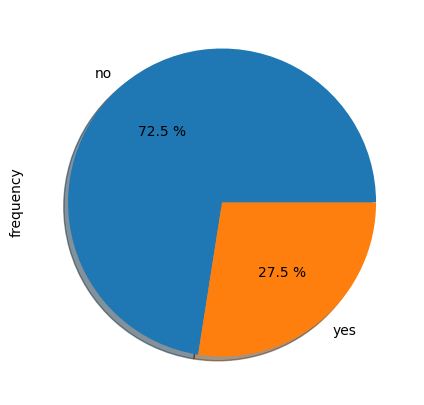

In [37]:
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

###**99_does_the_micro_retailer_exhibits_products_outside_**

In [38]:
nombre_columna = '99_does_the_micro_retailer_exhibits_products_outside_'
tabla= freq_tbl(Datos_limpios[nombre_columna])
Filtro= tabla[tabla['frequency']>2]
Filtro_index= Filtro.set_index(nombre_columna)
Filtro_index

,frequency,percentage,cumulative_perc
99_does_the_micro_retailer_exhibits_products_outside_,,,
no,120,0.701754,0.701754
yes,51,0.298246,1.000000


<Axes: ylabel='frequency'>

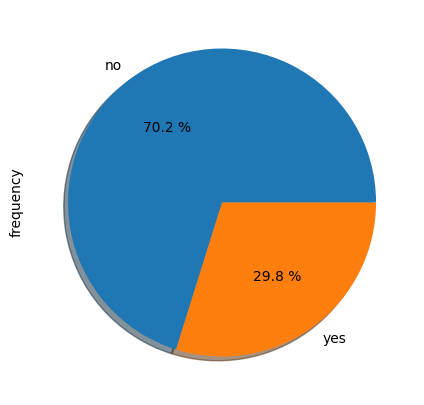

In [39]:
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

###**102_does_the_micro_retailer_sells_fresh_products_**

In [40]:
nombre_columna = '102_does_the_micro_retailer_sells_fresh_products_'
tabla= freq_tbl(Datos_limpios[nombre_columna])
Filtro= tabla[tabla['frequency']>2]
Filtro_index= Filtro.set_index(nombre_columna)
Filtro_index

,frequency,percentage,cumulative_perc
102_does_the_micro_retailer_sells_fresh_products_,,,
no,105,0.614035,0.614035
yes,66,0.385965,1.000000


<Axes: ylabel='frequency'>

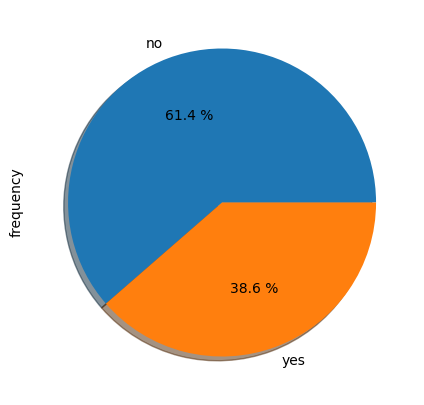

In [41]:
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

###**184_store_devices**

In [42]:
nombre_columna = '184_store_devices'
tabla= freq_tbl(Datos_limpios[nombre_columna])
Filtro= tabla[tabla['frequency']>4]
Filtro_index= Filtro.set_index(nombre_columna)
Filtro_index

,frequency,percentage,cumulative_perc
184_store_devices,,,
Smartphone,52,0.304094,0.304094
Analog cash register,16,0.093567,0.397661
POS system (i.e. computer + bar code scanner + printer),9,0.052632,0.450292
"POS system (i.e. computer + bar code scanner + printer),Smartphone",9,0.052632,0.502924
"Analog cash register,Smartphone",8,0.046784,0.549708
"Security cameras,Smartphone",7,0.040936,0.590643
"Dataphone (i.e. card payments),Security cameras,Smartphone",5,0.029240,0.619883
Security cameras,5,0.029240,0.649123


<Axes: ylabel='frequency'>

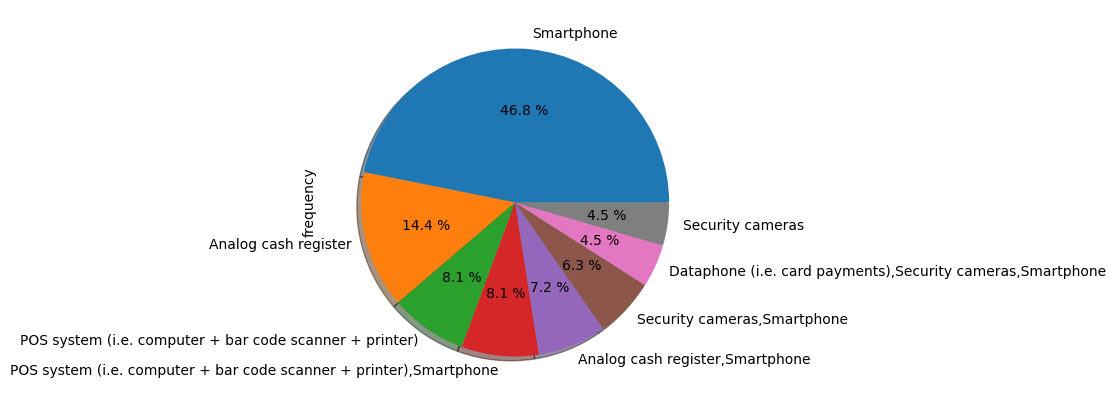

In [43]:
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

###**20_reviews_finances_monthly**

In [44]:
nombre_columna = '20_reviews_finances_monthly'
tabla= freq_tbl(Datos_limpios[nombre_columna])
Filtro= tabla[tabla['frequency']>2]
Filtro_index= Filtro.set_index(nombre_columna)
Filtro_index

,frequency,percentage,cumulative_perc
20_reviews_finances_monthly,,,
yes,79,0.461988,0.461988
Sin categoría,63,0.368421,0.830409
no,29,0.169591,1.000000


<Axes: ylabel='frequency'>

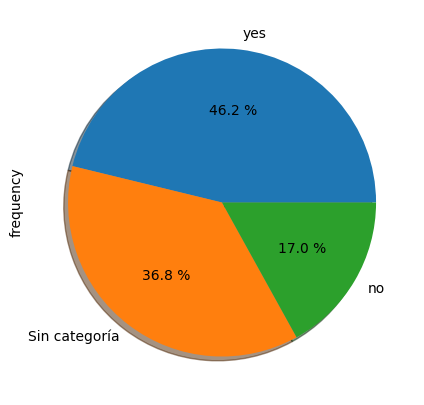

In [45]:
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

###**49_inventory_records**

In [46]:
nombre_columna = '49_inventory_records'
tabla= freq_tbl(Datos_limpios[nombre_columna])
Filtro= tabla[tabla['frequency']>2]
Filtro_index= Filtro.set_index(nombre_columna)
Filtro_index

,frequency,percentage,cumulative_perc
49_inventory_records,,,
Sin categoría,61,0.356725,0.356725
En papel,40,0.233918,0.590643
Software especializado + computadora,21,0.122807,0.713450
En Excel,20,0.116959,0.830409
No lo hago,18,0.105263,0.935673
"En Excel,En papel",7,0.040936,0.976608


<Axes: ylabel='frequency'>

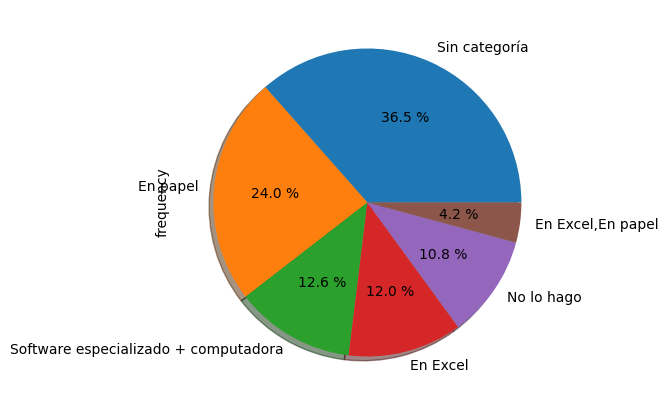

In [47]:
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

###**18_sales_records**

In [48]:
nombre_columna = '18_sales_records'
tabla= freq_tbl(Datos_limpios[nombre_columna])
Filtro= tabla[tabla['frequency']>2]
Filtro_index= Filtro.set_index(nombre_columna)
Filtro_index

,frequency,percentage,cumulative_perc
18_sales_records,,,
Sin categoría,61,0.356725,0.356725
En papel,47,0.274854,0.631579
Software especializado + computadora,22,0.128655,0.760234
No lo hago,14,0.081871,0.842105
En Excel,10,0.058480,0.900585
Caja registradora (análoga),4,0.023392,0.923977
"En Excel,En papel",4,0.023392,0.947368


<Axes: ylabel='frequency'>

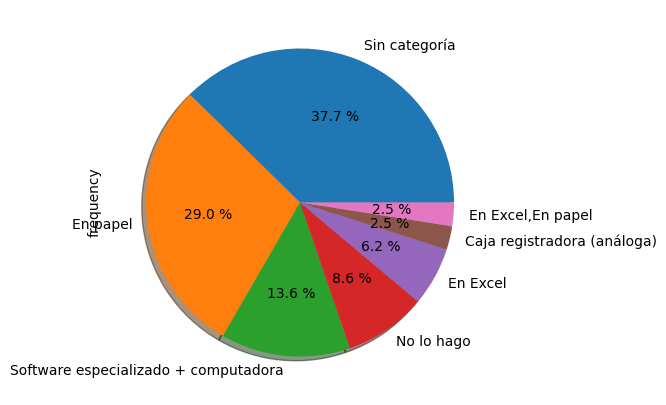

In [49]:
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

###**19_tax_id**

In [50]:
nombre_columna = '19_tax_id'
tabla= freq_tbl(Datos_limpios[nombre_columna])
Filtro= tabla[tabla['frequency']>2]
Filtro_index= Filtro.set_index(nombre_columna)
Filtro_index

,frequency,percentage,cumulative_perc
19_tax_id,,,
Sin categoría,71,0.415205,0.415205
yes,70,0.409357,0.824561
no,30,0.175439,1.000000


<Axes: ylabel='frequency'>

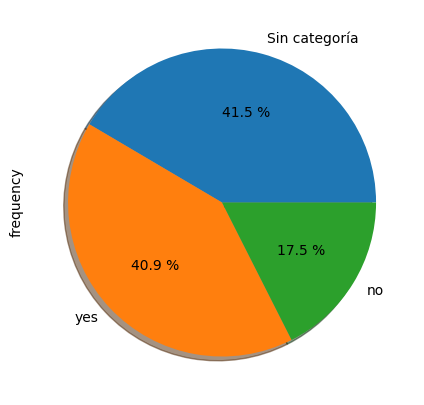

In [51]:
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

###**310_burnout**

In [52]:
nombre_columna = '310_burnout'
tabla= freq_tbl(Datos_limpios[nombre_columna])
Filtro= tabla[tabla['frequency']>2]
Filtro_index= Filtro.set_index(nombre_columna)
Filtro_index

,frequency,percentage,cumulative_perc
310_burnout,,,
no,68,0.397661,0.397661
Sin categoría,64,0.374269,0.771930
yes,39,0.228070,1.000000


<Axes: ylabel='frequency'>

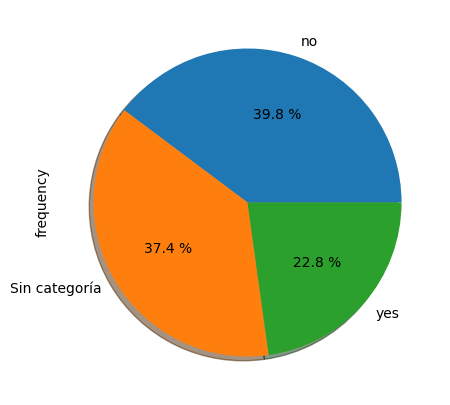

In [53]:
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

###**186_internet_connection**

In [54]:
nombre_columna = '186_internet_connection'
tabla= freq_tbl(Datos_limpios[nombre_columna])
Filtro= tabla[tabla['frequency']>2]
Filtro_index= Filtro.set_index(nombre_columna)
Filtro_index

,frequency,percentage,cumulative_perc
186_internet_connection,,,
yes,76,0.444444,0.444444
Sin categoría,63,0.368421,0.812865
no,32,0.187135,1.000000


<Axes: ylabel='frequency'>

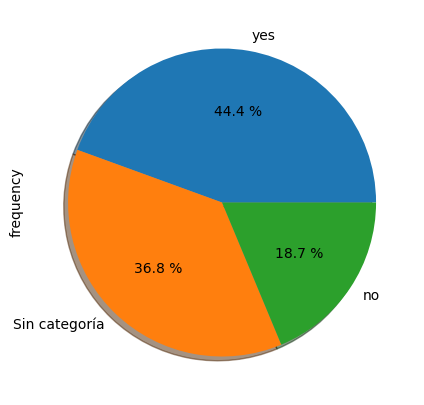

In [55]:
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

###**189_payment_methods**

In [56]:
nombre_columna = '189_payment_methods'
tabla= freq_tbl(Datos_limpios[nombre_columna])
Filtro= tabla[tabla['frequency']>2]
Filtro_index= Filtro.set_index(nombre_columna)
Filtro_index

,frequency,percentage,cumulative_perc
189_payment_methods,,,
Sin categoría,64,0.374269,0.374269
Efectivo,40,0.233918,0.608187
"Efectivo,Tarjeta de débito y/o crédito,Transferencia interbancaria",30,0.175439,0.783626
"Efectivo,Tarjeta de débito y/o crédito",19,0.111111,0.894737
"Efectivo,Transferencia interbancaria",15,0.087719,0.982456


<Axes: ylabel='frequency'>

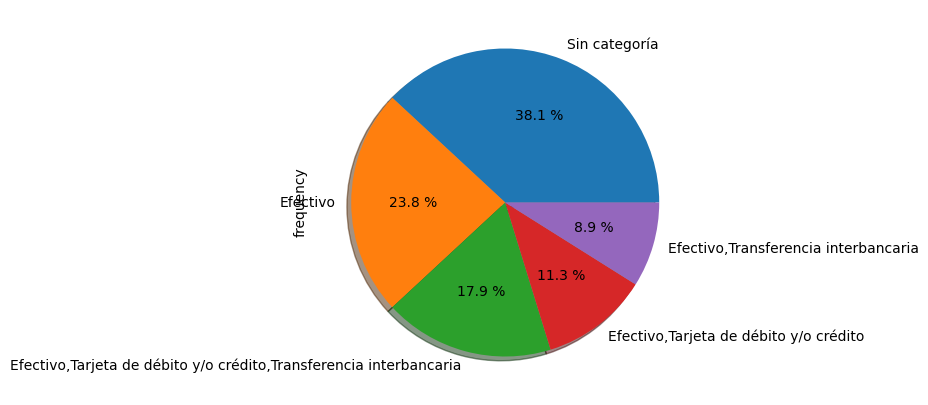

In [57]:
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

###**214_customer_relationship_tools**

In [58]:
nombre_columna = '214_customer_relationship_tools'
tabla= freq_tbl(Datos_limpios[nombre_columna])
Filtro= tabla[tabla['frequency']>2]
Filtro_index= Filtro.set_index(nombre_columna)
Filtro_index

,frequency,percentage,cumulative_perc
214_customer_relationship_tools,,,
Sin categoría,76,0.444444,0.444444
Redes sociales,27,0.157895,0.602339
Aplicación móvil,21,0.122807,0.725146
Ninguna,20,0.116959,0.842105
"Aplicación móvil,Redes sociales",13,0.076023,0.918129
Cuaderno,6,0.035088,0.953216


<Axes: ylabel='frequency'>

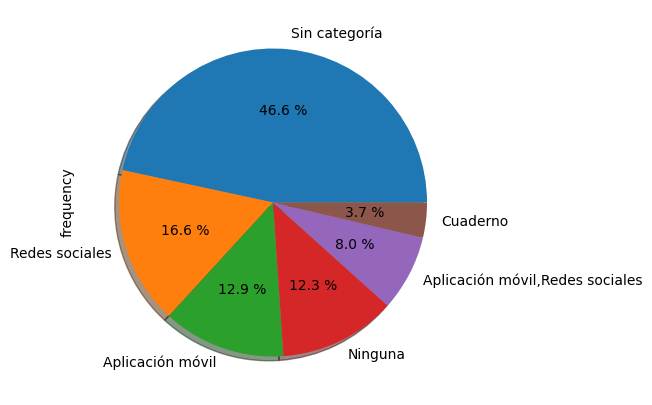

In [59]:
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

###**33_credit_to_customers**

In [60]:
nombre_columna = '33_credit_to_customers'
tabla= freq_tbl(Datos_limpios[nombre_columna])
Filtro= tabla[tabla['frequency']>2]
Filtro_index= Filtro.set_index(nombre_columna)
Filtro_index

,frequency,percentage,cumulative_perc
33_credit_to_customers,,,
no,80,0.467836,0.467836
Sin categoría,64,0.374269,0.842105
yes,27,0.157895,1.000000


<Axes: ylabel='frequency'>

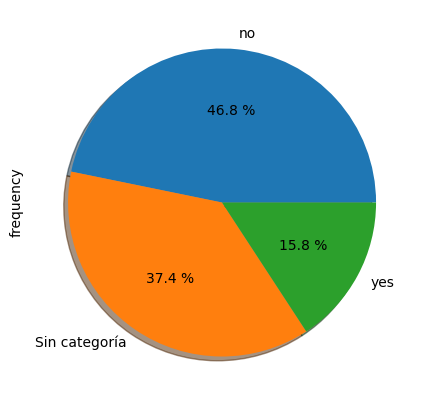

In [61]:
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

###**227_agreement_ecommerce_platforms**

In [62]:
nombre_columna = '227_agreement_ecommerce_platforms'
tabla= freq_tbl(Datos_limpios[nombre_columna])
Filtro= tabla[tabla['frequency']>2]
Filtro_index= Filtro.set_index(nombre_columna)
Filtro_index

,frequency,percentage,cumulative_perc
227_agreement_ecommerce_platforms,,,
no,88,0.514620,0.51462
Sin categoría,73,0.426901,0.94152
yes,10,0.058480,1.00000


<Axes: ylabel='frequency'>

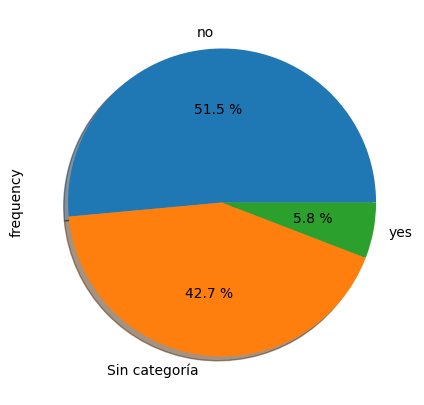

In [63]:
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

###**157_frequency_organize_shelves**

In [64]:
nombre_columna = '157_frequency_organize_shelves'
tabla= freq_tbl(Datos_limpios[nombre_columna])
Filtro= tabla[tabla['frequency']>3]
Filtro_index= Filtro.set_index(nombre_columna)
Filtro_index

,frequency,percentage,cumulative_perc
157_frequency_organize_shelves,,,
Sin categoría,75,0.438596,0.438596
Semanalmente,40,0.233918,0.672515
Diariamente,32,0.187135,0.859649
Nunca,8,0.046784,0.906433
Mensualmente,7,0.040936,0.947368
Quincenalmente,5,0.029240,0.976608


<Axes: ylabel='frequency'>

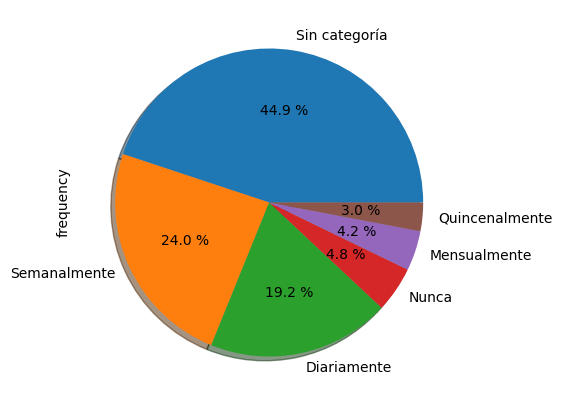

In [65]:
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

###**210_sales_channels**

In [66]:
nombre_columna = '210_sales_channels'
tabla= freq_tbl(Datos_limpios[nombre_columna])
Filtro= tabla[tabla['frequency']>3]
Filtro_index= Filtro.set_index(nombre_columna)
Filtro_index

,frequency,percentage,cumulative_perc
210_sales_channels,,,
Sin categoría,89,0.520468,0.520468
"Redes sociales (e.g. Facebook, Instagram)",11,0.064327,0.584795
WhatsApp,10,0.058480,0.643275
"Redes sociales (e.g. Facebook, Instagram),WhatsApp",9,0.052632,0.695906
Llamada a Teléfono fijo,6,0.035088,0.730994
"Llamada a Teléfono celular,WhatsApp",6,0.035088,0.766082
Llamada a Teléfono celular,5,0.029240,0.795322
"Llamada a Teléfono celular,Redes sociales (e.g. Facebook, Instagram),WhatsApp",5,0.029240,0.824561


<Axes: ylabel='frequency'>

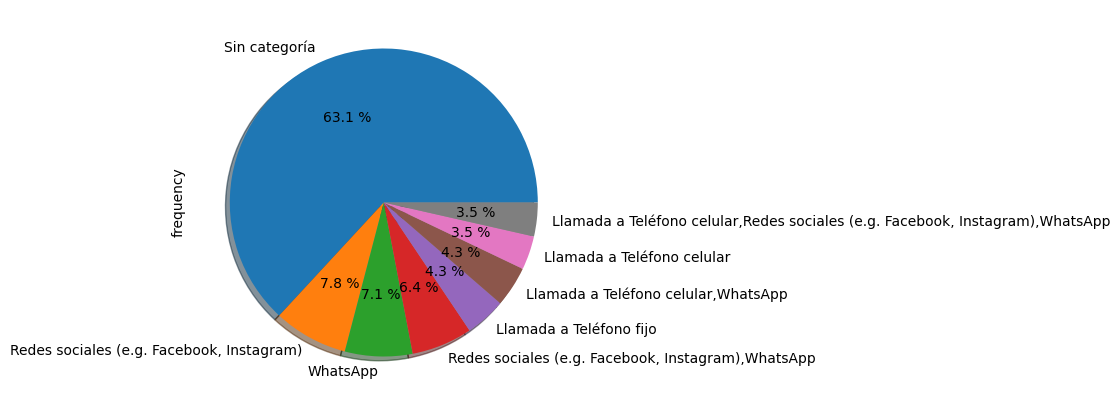

In [67]:
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

###**193_sales_planning_tools**

In [68]:
nombre_columna = '193_sales_planning_tools'
tabla= freq_tbl(Datos_limpios[nombre_columna])
Filtro= tabla[tabla['frequency']>3]
Filtro_index= Filtro.set_index(nombre_columna)
Filtro_index

,frequency,percentage,cumulative_perc
193_sales_planning_tools,,,
Sin categoría,89,0.520468,0.520468
Ninguna,33,0.192982,0.713450
Cuaderno,21,0.122807,0.836257
Software especializado,6,0.035088,0.871345
Excel,6,0.035088,0.906433


<Axes: ylabel='frequency'>

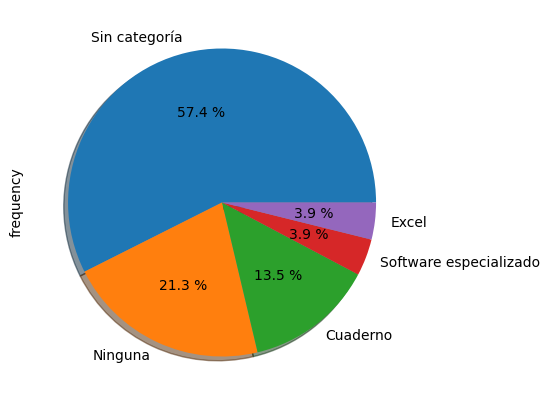

In [69]:
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

###**42_willingness_share_inventory_data_suppliers**

In [70]:
nombre_columna = '42_willingness_share_inventory_data_suppliers'
tabla= freq_tbl(Datos_limpios[nombre_columna])
Filtro= tabla[tabla['frequency']>2]
Filtro_index= Filtro.set_index(nombre_columna)
Filtro_index

,frequency,percentage,cumulative_perc
42_willingness_share_inventory_data_suppliers,,,
Sin categoría,91,0.532164,0.532164
Totalmente en desacuerdo,49,0.286550,0.818713
Algo de acuerdo,13,0.076023,0.894737
Algo en desacuerdo,8,0.046784,0.941520
Ni de acuerdo ni en desacuerdo,6,0.035088,0.976608
Totalmente de acuerdo,4,0.023392,1.000000


<Axes: ylabel='frequency'>

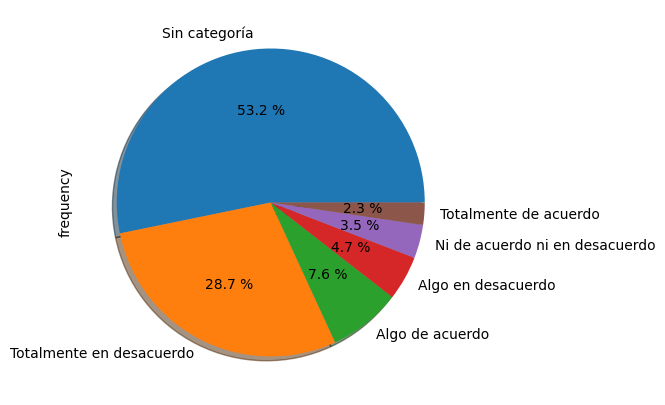

In [71]:
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")